# Q1 
**(10%)** There are many activations utilized in DL, e.g., sigmoid, ReLU, SeLU, etc. Can you compare their pros and cons? Please also address proper application contexts for each activation function.

|    Name   |                                                                            Pro                                                                            |                                                   Cons                                                   |
|:---------:|:---------------------------------------------------------------------------------------------------------------------------------------------------------:|:--------------------------------------------------------------------------------------------------------:|
| **Step** | Good to use at output layer for binary classification |     Derivative=0, no learning |
|**Linear** | It gives a range of activations, so it is not binary activation.<br> We can definitely connect a few neurons together and if more than 1 fires,<br> we could take the max ( or softmax) and decide based on that.  |     For this function, derivative is a constant. That means, the gradient has no relationship with X. <br> It is a constant gradient and the descent is going to be on constant gradient. <br> If there is an error in prediction, the changes made by back propagation is <br> constant and not depending on the change in input delta(x) !   |
| **ELU** | ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes. <br> ELU is a strong alternative to ReLU. <br> Unlike to ReLU, ELU can produce negative outputs. | For x > 0, it can blow up the activation with the output range of [0, inf]. |
| **Sigmoid** | It is nonlinear in nature. Combinations of this function are also nonlinear! <br> It will give an analog activation unlike step function. <br> It has a smooth gradient too. <br> It’s good for a classifier. <br> The output of the activation function is always going to be in range (0,1) compared to <br> (-inf, inf) of linear function.<br> So we have our activations bound in a range. Nice, it won’t blow up the activations then. | Towards either end of the sigmoid function, the Y values tend to respond very less to changes in X. <br> It gives rise to a problem of “vanishing gradients”. <br> Its output isn’t zero centered. It makes the gradient updates go too far in <br> different directions. 0 < output < 1, and it makes optimization harder. <br> Sigmoids saturate and kill gradients. <br> The network refuses to learn further or is drastically slow ( depending on use case and <br> until gradient /computation gets hit by floating point value limits ). |
| **Tanh** | The gradient is stronger for tanh than sigmoid ( derivatives are steeper). | Tanh also has the vanishing gradient problem. |
| **ReLU** | It avoids and rectifies vanishing gradient problem.<br>ReLu is less computationally expensive than tanh and sigmoid<br> because it involves simpler mathematical operations. | One of its limitation is that it should only be used within Hidden layers of a Neural Network Model. <br> Some gradients can be fragile during training and can die.<br> It can cause a weight update which will makes it never activate on any data point again. <br> Simply saying that ReLu could result in Dead Neurons. <br> In another words, For activations in the region (x < 0) of ReLu, gradient will be 0 <br> because of which the weights will not get adjusted during descent.<br> That means, those neurons which go into that state will stop responding to <br> variations in error/ input ( simply because gradient is 0, nothing changes ). This is called dying ReLu problem. <br> The range of ReLu is [0, inf). This means it can blow up the activation. |
| **LeakyReLU** | Leaky ReLUs are one attempt to fix the “dying ReLU” problem by <br> having a small negative slope (of 0.01, or so). | As it possess linearity, it can’t be used for the complex Classification.<br> It lags behind the Sigmoid and Tanh for some of the use cases. |
|  **Softmax**  | Similar to Sigmoid<br>Good to use at output layer for multi-class problems since it<br>convert input matrix into probability matrix | Should not be used in hidden layer.<br>It makes your hidden variable linear separable -> less generalize |



---
---
Reference: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html, https://missinglink.ai/guides/neural-network-concepts/7-types-neural-network-activation-functions-right/





# Q2
**(10%)** How to avoid overfitting at DNN model? Please discuss at least three ways and compare them.

There are many ways to avoid overfitting.


1. **Simplifying the Model:** The first step when dealing with overfitting is to decrease the complexity of the model. To decrease the complexity, we can simply remove layers or reduce the number of neurons to make the network smaller.
2. **Early Stopping:** Early stopping is a form of regularization while training a model with an iterative method, such as gradient descent. Since all the neural networks learn exclusively by using gradient descent, early stopping is a technique applicable to all the problems. This method update the model so as to make it better fit the training data with each iteration.
3. **Data Augmentation:** In the case of neural networks, data augmentation simply means increasing size of the data that is increasing the number of images present in the dataset. Some of the popular image augmentation techniques are flipping, translation, rotation, scaling, changing brightness, adding noise etcetera. 
4. **Regularization:** Regularization is a technique to reduce the complexity of the model. It does so by adding a penalty term to the loss function. The most common techniques are known as L1 and L2 regularization.
5. **Dropouts:** Dropout is a regularization technique that prevents neural networks from overfitting. Regularization methods like L1 and L2 reduce overfitting by modifying the cost function. Dropout on the other hand, modify the network itself. It randomly drops neurons from the neural network during training in each iteration.

Reference: https://www.kdnuggets.com/2019/12/5-techniques-prevent-overfitting-neural-networks.html




# Q3
**(10%)** How to use Data Normalization to improve DNN model training and performance? Please discuss at least two methods and compare them.

The goal of normalization is to transform features to be on a similar scale. This improves the performance and training stability of the model.

Four common normalization techniques may be useful:

1. **Scaling to a range:** Recall from MLCC that scaling means converting floating-point feature values from their natural range (for example, 100 to 900) into a standard range—usually 0 and 1 (or sometimes -1 to +1).
2. **Clipping:** If your data set contains extreme outliers, you might try feature clipping, which caps all feature values above (or below) a certain value to fixed value.
3. **Log scaling:** Log scaling computes the log of your values to compress a wide range to a narrow range.
4. **Z-score:** Z-score is a variation of scaling that represents the number of standard deviations away from the mean. You would use z-score to ensure your feature distributions have mean = 0 and std = 1.

Reference: https://developers.google.com/machine-learning/data-prep/transform/normalization






# Q4
**(40%, coding assignment)** Train a deep MLP to perform regression task to predict price based on the California housing dataset (you can load it from https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html). Try tuning parameters, layers, neurons, activation functions, learning rate, etc. Find your best tuned model and plot learning curves, as we show at our coding demo during class. 

In [33]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
housing_datasets = fetch_california_housing()

In [4]:
x_train_full, x_test, y_train_full, y_test = train_test_split(housing_datasets.data, housing_datasets.target)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_full, y_train_full)

In [5]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_validation = scaler.fit_transform(x_validation)
x_test = scaler.fit_transform(x_test)

In [27]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(640,activation='relu',  input_shape = x_train.shape[1:]))
model.add(Dense(320,activation='relu'))
model.add(Dense(160,activation='relu'))
model.add(Dense(80,activation='relu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(10))

In [29]:
model.compile(loss = "mse", optimizer = 'sgd', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=20,validation_data=(x_validation, y_validation))

Epoch 1/20
363/363 [==============================] - 2s 5ms/step - loss: 1.2562 - mae: 0.7717 - val_loss: 0.4796 - val_mae: 0.4974
Epoch 2/20
363/363 [==============================] - 2s 5ms/step - loss: 0.4292 - mae: 0.4681 - val_loss: 0.3956 - val_mae: 0.4355
Epoch 3/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3916 - mae: 0.4470 - val_loss: 0.3946 - val_mae: 0.4320
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3730 - mae: 0.4335 - val_loss: 0.3910 - val_mae: 0.4514
Epoch 5/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3611 - mae: 0.4268 - val_loss: 0.3466 - val_mae: 0.4097
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3534 - mae: 0.4200 - val_loss: 0.3538 - val_mae: 0.4021
Epoch 7/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3444 - mae: 0.4148 - val_loss: 0.3413 - val_mae: 0.4015
Epoch 8/20
363/363 [==============================] - 2s 5ms/step - loss: 0.

In [30]:
mean_squared_error_test = model.evaluate(x_test, y_test)
x_new = x_test # New instance
y_pred = model.predict(x_new)
y_pred

162/162 [==============================] - 0s 2ms/step - loss: 3.5466 - mae: 1.2606


array([[ 1.4749289 ,  1.4602829 ,  1.4516387 , ...,  1.4619161 ,
         1.4761207 ,  1.4552566 ],
       [ 1.3168843 ,  1.3085206 ,  1.3136494 , ...,  1.3038448 ,
         1.3028853 ,  1.312368  ],
       [ 0.7970395 ,  0.7838004 ,  0.77675545, ...,  0.7800964 ,
         0.784365  ,  0.7713324 ],
       ...,
       [ 1.0805212 ,  1.0803721 ,  1.0662996 , ...,  1.0676451 ,
         1.1105132 ,  1.0766976 ],
       [10.499419  ,  9.900435  , 10.043178  , ..., 10.42293   ,
         9.913398  ,  9.892415  ],
       [ 1.3746393 ,  1.3706554 ,  1.3714339 , ...,  1.3615589 ,
         1.3332908 ,  1.3699656 ]], dtype=float32)

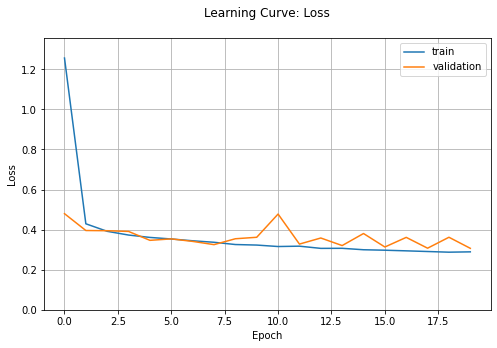

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

max_loss= max(history.history['loss'])+0.1
plt.gca().set_ylim(0, max_loss)

plt.title('Learning Curve: Loss\n')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.gcf().set_size_inches(8, 5)
plt.grid(True)
plt.show()

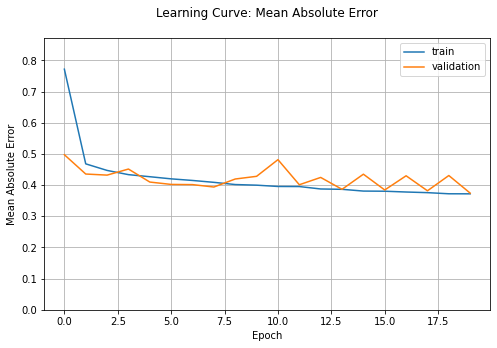

In [39]:
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])

max_loss= max(history.history['mae'])+0.1
plt.gca().set_ylim(0, max_loss)

plt.title('Learning Curve: Mean Absolute Error\n')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.gcf().set_size_inches(8, 5)
plt.grid(True)
plt.show()

# Q5


## 1 When we train a neural network, we notice that the loss does not decrease in a few starting epochs, what’s the reason for this? What is the strategy to improve?

Reason: The learning rate is low, regularization parameter is high, stuck at local minima. <br>
Strategy: Jitter the learning rate, i.e. change the learning rate for a few epochs, this can be used to take a neural network out of local minima.

Please calculate **X’s min-max normalizations, Z-score normalization, l2 normalization**

In [18]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler, normalize
from scipy import stats

X = np.array([[ 1., -1., 2.],
              [ 2., 0., 0.],
              [ 0., 1., -1.]])
print("Data")
print(X)
print("-----------------------------------------------")
print("Min-Max Normalization")
print("-----------------------------------------------")
scaler = MinMaxScaler()
scaler.fit(X)
print(scaler.transform(X))
print("-----------------------------------------------")
print("Z-Score Normalization")
print("-----------------------------------------------")
print(stats.zscore(X))
print("-----------------------------------------------")
print("l2 Normalization")
print("-----------------------------------------------")
print(normalize(X, norm='l2'))

Data
[[ 1. -1.  2.]
 [ 2.  0.  0.]
 [ 0.  1. -1.]]
-----------------------------------------------
Min-Max Normalization
-----------------------------------------------
[[0.5        0.         1.        ]
 [1.         0.5        0.33333333]
 [0.         1.         0.        ]]
-----------------------------------------------
Z-Score Normalization
-----------------------------------------------
[[ 0.         -1.22474487  1.33630621]
 [ 1.22474487  0.         -0.26726124]
 [-1.22474487  1.22474487 -1.06904497]]
-----------------------------------------------
l2 Normalization
-----------------------------------------------
[[ 0.40824829 -0.40824829  0.81649658]
 [ 1.          0.          0.        ]
 [ 0.          0.70710678 -0.70710678]]


## 2. Transfer Learning
The problem is you are trying to train a deep learning model but only a small amount of data is
available. Fortunately, there is a pre-trained neural network that was trained on a similar
problem. Which one of the following methodologies is the best choice that can make use of this
pre-trained network? <br>
A. Retrain the model from scratch for the new dataset <br>
B. Only fine tune the last couple of layers of the pre-trained model with small learning rate <br>
C. Freeze all the layers except the last, and only retrain the last layer <br>
D. Assess on every layer how the pre-trained model performs and only select a few of them
with respect to their performances

**Ans.** C

## 3. Please provide at least three learning rate scheduling and briefly describe each of them. 

**Ans.** Power scheduling utilizes $\eta(t) = \frac{\eta_{0}}{(1+ t/s)^{c}}  $ as the function of the iteration number t for setting the learning rate. This learning rate scheduling require $\eta_{0} ,s$ and possibly c for tuning;
they are the hyperparameters as well. During each step, the learning rate will drop until it reaches s step, then it is down to $\frac{\eta_{0}}{2}$ ; after s more steps, it will be down to then $\frac{\eta_{0}}{3}$ then $\frac{\eta_{0}}{4}$
and so on. Eventually, the drop rate for the learning rate will be changed from fast to gradual.

Piecewise constant scheduling focuses on sequences that it requires effort and time to figure out which sequence works the best with less required time. Basically, we can pick a constant learning rate with a number of epochs, then adjust it to a smaller learning rate with a different number of epochs, and so on until the best sequence is selected.

Compared to other approaches, 1 cycle scheduling is different that it starts with increasing $\eta_{0}$ ( the initial learning rate that is selected approximately 10 times lower than $\eta_{1}$ ), then growing linearly up to $\eta_{1}$ (using the same method to find the optimal learning rate to seek for the maximum rate of $\eta_{1}$ ) halfway through training. Next, the learning rate is dropped linearly to $\eta_{0}$ again during the second half of training. Lastly, we can utilize several linear orders of 0
magnitude as the limitation for dropping rate to finish the last few epoches. Basically, we are starting with high momentum, then drop it down to lower momentum, next is to bring it back up to the maximum value, finally finishing it with the maximum value.

# Q6
**(Bonus!, coding assignment 10%)** Practice training a deep neural network on the https://keras.io/api/datasets/fashion_mnist/#load_data-function dataset for fashion style classification task: 
1. Build a DNN with 10 hidden layers of 30 neurons each. Use He initialization (see Géron A. Hands-on textbook p. 333) and the ELU activation function. Using Nadam optimization and early stopping(see https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/), train the network on this fashion MNIST dataset.
2. Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?
3. Try replacing Batch Normalization with SELU and make the necessary adjustments to ensure the network self-normalizes (i.e., standardize the input features).
4. Try regularizing the model with some dropout and compare model performance. 
5. Retrain your model using some learning rate scheduling, e.g., 1cycle scheduling, and to compare whether it improves training speed and model accuracy.


##  Importing Librares

In [65]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from keras.initializers import he_normal, lecun_normal
from keras.callbacks import EarlyStopping, LearningRateScheduler
from keras.optimizers import SGD
import matplotlib.pyplot as plt
import math

## Loading the Data

In [42]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0],28*28)
x_test = x_test.reshape(x_test.shape[0],28*28)
x_train=x_train/255
x_test = x_test/255

4423680/4422102 [==============================] - 0s 0us/step


## 1. DNN Model

In [52]:
md = Sequential()
md.add(Dense(30, activation = 'elu', input_shape = (784,), kernel_initializer = he_normal(seed = None)))
md.add(Dense(30, activation = 'elu', kernel_initializer = he_normal(seed = None)))
md.add(Dense(30, activation = 'elu', kernel_initializer = he_normal(seed = None)))
md.add(Dense(30, activation = 'elu', kernel_initializer = he_normal(seed = None)))
md.add(Dense(30, activation = 'elu', kernel_initializer = he_normal(seed = None)))
md.add(Dense(30, activation = 'elu', kernel_initializer = he_normal(seed = None)))
md.add(Dense(30, activation = 'elu', kernel_initializer = he_normal(seed = None)))
md.add(Dense(30, activation = 'elu', kernel_initializer = he_normal(seed = None)))
md.add(Dense(30, activation = 'elu', kernel_initializer = he_normal(seed = None)))
md.add(Dense(30, activation = 'elu', kernel_initializer = he_normal(seed = None)))
md.add(Dense(10, activation = 'softmax'))

es = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 3)

md.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
md.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_test, y_test), verbose = 1, callbacks=[es])

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.6119 - accuracy: 0.7800 - val_loss: 0.4617 - val_accuracy: 0.8334
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4096 - accuracy: 0.8499 - val_loss: 0.4473 - val_accuracy: 0.8360
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3718 - accuracy: 0.8633 - val_loss: 0.4101 - val_accuracy: 0.8489
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3450 - accuracy: 0.8730 - val_loss: 0.3992 - val_accuracy: 0.8530
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3298 - accuracy: 0.8781 - val_loss: 0.4178 - val_accuracy: 0.8474
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3159 - accuracy: 0.8838 - val_loss: 0.3723 - val_accuracy: 0.8641
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3037 - accuracy: 0.8882 - val_loss: 0.3679 - val_accuracy: 0.8642
Epoch 

## 2. Batch Normalization

In [53]:
md_bn = Sequential()
md_bn.add(Dense(30, activation = 'elu', input_shape = (784,)))
md_bn.add(BatchNormalization())
md_bn.add(Dense(30, activation = 'elu'))
md_bn.add(BatchNormalization())
md_bn.add(Dense(30, activation = 'elu'))
md_bn.add(BatchNormalization())
md_bn.add(Dense(30, activation = 'elu'))
md_bn.add(BatchNormalization())
md_bn.add(Dense(30, activation = 'elu'))
md_bn.add(BatchNormalization())
md_bn.add(Dense(30, activation = 'elu'))
md_bn.add(BatchNormalization())
md_bn.add(Dense(30, activation = 'elu'))
md_bn.add(BatchNormalization())
md_bn.add(Dense(30, activation = 'elu'))
md_bn.add(BatchNormalization())
md_bn.add(Dense(30, activation = 'elu'))
md_bn.add(BatchNormalization())
md_bn.add(Dense(30, activation = 'elu'))
md_bn.add(BatchNormalization())
md_bn.add(Dense(10, activation = 'softmax'))

es = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 3)

md_bn.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
md_bn.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_test, y_test), verbose = 1, callbacks=[es])

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5712 - accuracy: 0.8054 - val_loss: 0.4452 - val_accuracy: 0.8408
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3932 - accuracy: 0.8581 - val_loss: 0.4150 - val_accuracy: 0.8491
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3577 - accuracy: 0.8706 - val_loss: 0.4070 - val_accuracy: 0.8526
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3377 - accuracy: 0.8780 - val_loss: 0.3997 - val_accuracy: 0.8564
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3201 - accuracy: 0.8841 - val_loss: 0.3822 - val_accuracy: 0.8597
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3089 - accuracy: 0.8874 - val_loss: 0.3749 - val_accuracy: 0.8680
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2996 - accuracy: 0.8905 - val_loss: 0.3797 - val_accuracy: 0.8647
Epoch 

### Comparing DNN Model with Batch Normalization Model

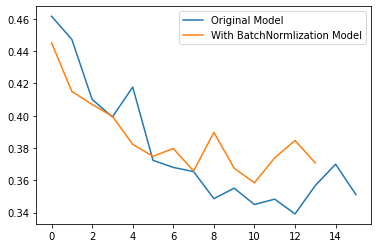

In [58]:
plt.plot(md.history.history['val_loss'], label = 'Original Model')
plt.plot(md_bn.history.history['val_loss'], label = 'With BatchNormlization Model')
plt.legend()
plt.show()

## 3. Selu 

In [55]:
md_selu = Sequential()
md_selu.add(Dense(30, activation = 'selu', input_shape = (784,), kernel_initializer = lecun_normal()))
md_selu.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_selu.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_selu.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_selu.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_selu.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_selu.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_selu.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_selu.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_selu.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_selu.add(Dense(10, activation = 'softmax'))

es = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 3)

md_selu.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
md_selu.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_test, y_test), verbose = 1, callbacks=[es])

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 0.6212 - accuracy: 0.7743 - val_loss: 0.4842 - val_accuracy: 0.8277
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.4258 - accuracy: 0.8446 - val_loss: 0.4208 - val_accuracy: 0.8464
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3862 - accuracy: 0.8578 - val_loss: 0.4089 - val_accuracy: 0.8541
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3591 - accuracy: 0.8679 - val_loss: 0.4525 - val_accuracy: 0.8328
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3434 - accuracy: 0.8722 - val_loss: 0.3794 - val_accuracy: 0.8635
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3319 - accuracy: 0.8769 - val_loss: 0.3635 - val_accuracy: 0.8706
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3201 - accuracy: 0.8810 - val_loss: 0.3721 - val_accuracy: 0.8681
Epoch 

### Comparing DNN Model with Batch Normalization Model and Selu Model

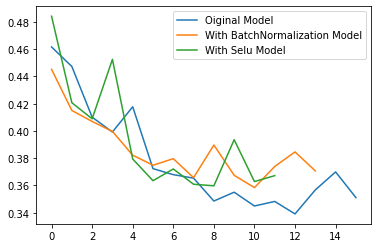

In [60]:
plt.plot(md.history.history['val_loss'], label = 'Oiginal Model')
plt.plot(md_bn.history.history['val_loss'], label = 'With BatchNormalization Model')
plt.plot(md_selu.history.history['val_loss'], label = 'With Selu Model')
plt.legend()
plt.show()

## 4. Dropout Selu 

In [62]:
md_dp = Sequential()
md_dp.add(Dense(30, activation = 'selu', input_shape = (784,), kernel_initializer = lecun_normal()))
md_dp.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_dp.add(Dropout(0.2))
md_dp.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_dp.add(Dropout(0.2))
md_dp.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_dp.add(Dropout(0.2))
md_dp.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_dp.add(Dropout(0.2))
md_dp.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_dp.add(Dropout(0.2))
md_dp.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_dp.add(Dropout(0.2))
md_dp.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_dp.add(Dropout(0.2))
md_dp.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_dp.add(Dropout(0.2))
md_dp.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_dp.add(Dropout(0.2))
md_dp.add(Dense(10, activation = 'softmax'))

es = EarlyStopping(monitor='val_loss', mode = 'min', verbose = 1, patience = 3)

md_dp.compile(optimizer='nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
md_dp.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_test, y_test), verbose = 1, callbacks=[es])

Epoch 1/20
469/469 [==============================] - 2s 5ms/step - loss: 1.3831 - accuracy: 0.4830 - val_loss: 0.6774 - val_accuracy: 0.7275
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.8618 - accuracy: 0.6785 - val_loss: 0.6103 - val_accuracy: 0.7640
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.7447 - accuracy: 0.7333 - val_loss: 0.5780 - val_accuracy: 0.7916
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.6751 - accuracy: 0.7695 - val_loss: 0.5433 - val_accuracy: 0.8076
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.6294 - accuracy: 0.7920 - val_loss: 0.5207 - val_accuracy: 0.8224
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5963 - accuracy: 0.8073 - val_loss: 0.5012 - val_accuracy: 0.8346
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.5725 - accuracy: 0.8180 - val_loss: 0.4855 - val_accuracy: 0.8403
Epoch 

### Comparing Selu Model with and without Dropout




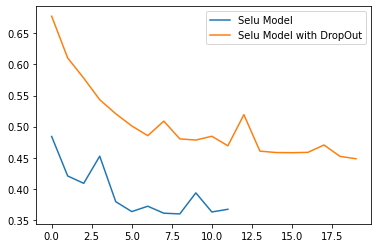

In [64]:
plt.plot(md_selu.history.history['val_loss'], label = 'Selu Model')
plt.plot(md_dp.history.history['val_loss'], label = 'Selu Model with DropOut')

plt.legend()
plt.show()

## 5. Learning Rate Scheduling

In [68]:
def decaying(epoch):
    initial_lrate = 0.01
    drop = 0.5
    epochs_drop = 10.0
    return initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))

sgd = SGD(lr=0.0, momentum=0.9)

md_lr = Sequential()
md_lr.add(Dense(30, activation = 'selu', input_shape = (784,), kernel_initializer = lecun_normal()))
md_lr.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_lr.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_lr.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_lr.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_lr.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_lr.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_lr.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_lr.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_lr.add(Dense(30, activation = 'selu', kernel_initializer = lecun_normal()))
md_lr.add(Dense(10, activation = 'softmax'))

md_lr.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lrate = LearningRateScheduler(decaying)
callbacks_list = [lrate]

md_lr.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data=(x_test, y_test), verbose = 1, callbacks=callbacks_list)

Epoch 1/20
469/469 [==============================] - 2s 4ms/step - loss: 0.6207 - accuracy: 0.7744 - val_loss: 0.4993 - val_accuracy: 0.8169
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4494 - accuracy: 0.8386 - val_loss: 0.5255 - val_accuracy: 0.8109
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.4107 - accuracy: 0.8518 - val_loss: 0.4790 - val_accuracy: 0.8304
Epoch 4/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3878 - accuracy: 0.8595 - val_loss: 0.4208 - val_accuracy: 0.8486
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3726 - accuracy: 0.8645 - val_loss: 0.4292 - val_accuracy: 0.8438
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.3540 - accuracy: 0.8708 - val_loss: 0.4181 - val_accuracy: 0.8490
Epoch 7/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3476 - accuracy: 0.8722 - val_loss: 0.3832 - val_accuracy: 0.8626
Epoch 

### Comparing Selu Model with Learning Rate Model

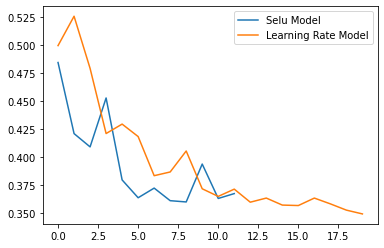

In [69]:
plt.plot(md_selu.history.history['val_loss'], label = 'Selu Model')
plt.plot(md_lr.history.history['val_loss'], label = 'Learning Rate Model')

plt.legend()
plt.show()